In [69]:
import pandas as pd
import numpy as np

In [70]:
reviews_df = pd.read_csv("../data/reviews.csv")

1. Drop any duplicate reviews
3. Calculate the weight so that 1 is the max, 0 is the min
3. Scale the suggestedPlayerCount scale to be between 0 and 1
2. Remove games that do not have enough reviews
2. Remove users that have not reviewed enough games


In [71]:
reviews_df.head()

,source_type,source_id,edge_type,target_type,target_id,rating,comment
0,Person,abbojm02,hasReviewed,Game,161936.0,10.0,Because all the people will be so mad.
1,Person,abbojm03,hasReviewed,Game,161936.0,10.0,Played this game more times than any other one...
2,Person,abbojm05,hasReviewed,Game,161936.0,10.0,Haters gonna hate.
3,Person,0Allegiance,hasReviewed,Game,174430.0,8.5,Excellent game. Balancing issues with some cha...
4,Person,37crows,hasReviewed,Game,174430.0,10.0,"Simply my favorite game, outstanding design."


In [72]:
print("Before dropping duplicates:",len(reviews_df))
reviews_df = reviews_df.drop_duplicates(subset=["source_id", "target_id"], keep='last')
print("After dropping duplicates:",len(reviews_df))

Before dropping duplicates: 1817291
After dropping duplicates: 1817291


In [73]:
reviews_df['weight'] = reviews_df.groupby("source_id")['rating'].transform( lambda x:  (x - np.min(x))/(np.max(x) - np.min(x)) if (np.max(x) - np.min(x)) > 1 else 0.5 )

In [74]:
counts_col_user = reviews_df.groupby("source_id")["source_id"].transform(len)
counts_col_games = reviews_df.groupby("target_id")["target_id"].transform(len)

In [75]:
counts_col_games.describe()

count    1.817291e+06
mean     6.312112e+02
std      8.018402e+02
min      1.000000e+00
25%      7.500000e+01
50%      2.910000e+02
75%      9.020000e+02
max      4.272000e+03
Name: target_id, dtype: float64

In [76]:
counts_col_user.describe()

count    1.817291e+06
mean     7.056101e+02
std      8.905114e+02
min      1.000000e+00
25%      2.270000e+02
50%      4.700000e+02
75%      8.730000e+02
max      8.955000e+03
Name: source_id, dtype: float64

In [77]:
k_user, k_game = 200, 150
k_max_user = 400
mask_user = counts_col_user >= k_user
mask_games = counts_col_games >= k_game
mask_max_user = counts_col_user <= k_max_user

In [78]:
print(f"Number of ratings before: {reviews_df.shape[0]}")
print(f"Number of games: {len(reviews_df['target_id'].unique())}" )
print(f"Number of users: {len(reviews_df['source_id'].unique())}" )
reviews_df_masked = reviews_df[mask_user & mask_games & mask_max_user]
print(f"Number of ratings after: {reviews_df_masked.shape[0]}")
print(f"Number of games: {len(reviews_df_masked['target_id'].unique())}" )
print(f"Number of users: {len(reviews_df_masked['source_id'].unique())}" )

reviews_df_masked.head(5)

Number of ratings before: 1817291
Number of games: 60975
Number of users: 17766
Number of ratings after: 278655
Number of games: 2463
Number of users: 1406


,source_type,source_id,edge_type,target_type,target_id,rating,comment,weight
3384,Person,adrian754,hasReviewed,Game,432.0,3.0,"Really a simple game and that's all, you guess...",0.000000
3385,Person,adrian754,hasReviewed,Game,68448.0,7.0,The draft mechanic and the theme concept of th...,0.571429
3386,Person,adrian754,hasReviewed,Game,173346.0,9.0,One of the best games exclusive for two player...,0.857143
3387,Person,adrian754,hasReviewed,Game,346703.0,6.0,NaN,0.428571
3388,Person,adrian754,hasReviewed,Game,5.0,8.0,"Simple rules, great strategy but you need some...",0.714286


In [79]:
reviews_df_masked = reviews_df_masked[reviews_df_masked['weight']>0]

<Axes: >

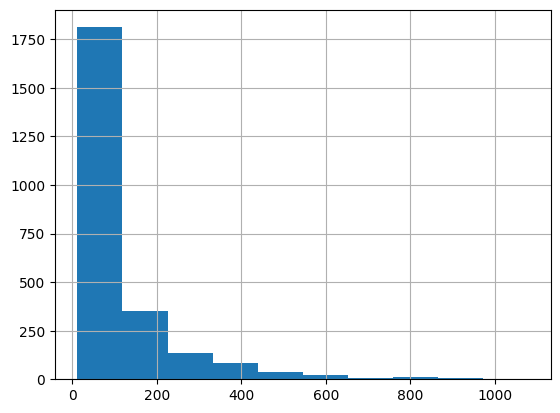

In [80]:
reviews_df_masked['target_id'].value_counts().hist()

<Axes: >

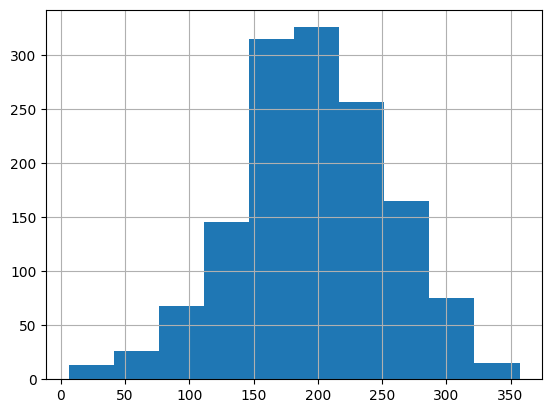

In [81]:
reviews_df_masked['source_id'].value_counts().hist()

In [82]:
reviews_df_masked

,source_type,source_id,edge_type,target_type,target_id,rating,comment,weight
3385,Person,adrian754,hasReviewed,Game,68448.0,7.0,The draft mechanic and the theme concept of th...,0.571429
3386,Person,adrian754,hasReviewed,Game,173346.0,9.0,One of the best games exclusive for two player...,0.857143
3387,Person,adrian754,hasReviewed,Game,346703.0,6.0,NaN,0.428571
3388,Person,adrian754,hasReviewed,Game,5.0,8.0,"Simple rules, great strategy but you need some...",0.714286
3389,Person,adrian754,hasReviewed,Game,31260.0,7.0,"Excellent level of strategy, every decision co...",0.571429
...,...,...,...,...,...,...,...,...
1817259,Person,Bagpuss64,hasReviewed,Game,27048.0,8.0,Z-Man Games is my kind of a company. Like so m...,0.777778
1817261,Person,BartowWing,hasReviewed,Game,27048.0,6.0,Like Conflict of Heroes...a eurogame disguised...,0.555556
1817269,Person,bigmop,hasReviewed,Game,27048.0,6.0,Finicky but maybe I haven't played it enough.,0.555556
1817277,Person,boudreaux00,hasReviewed,Game,27048.0,6.0,At first play I was frankly a little underwhel...,0.333333


In [83]:
game_ids_to_keep = reviews_df_masked['target_id'].unique()

In [84]:
len(game_ids_to_keep)

2463

In [85]:
game_info = pd.read_csv("../data/game_info.csv")

In [86]:
game_info.head(1)

,id,rank,name,short_description,avg_rating,num_ratings,thumbnail_url,long_description,complexity_socre,year_published,image_url,min_play_time,max_play_time,expected_play_time
0,224517,1.0,Brass: Birmingham,"Build networks, grow industries, and navigate ...",8.62,37652,https://cf.geekdo-images.com/x3zxjr-Vw5iU4yDPg...,Brass: Birmingham is an economic strategy game...,3.8978,2018.0,https://cf.geekdo-images.com/x3zxjr-Vw5iU4yDPg...,60.0,120.0,120.0


In [87]:
game_info_masked = game_info[game_info['id'].isin(game_ids_to_keep)]

In [88]:
games_with_info = game_info_masked['id'].unique()

In [89]:
reviews_df_masked = reviews_df_masked[reviews_df_masked['target_id'].isin(games_with_info)]

In [90]:
reviews_df_masked.sort_values(by='weight', ascending=True)

,source_type,source_id,edge_type,target_type,target_id,rating,comment,weight
1507837,Person,Champion Eternal,hasReviewed,Game,30380.0,1.01,Twice we tried playing this game. Twice we did...,0.001000
1453750,Person,chuft,hasReviewed,Game,132018.0,1.01,Have to agree with Severus Snape about the Her...,0.001111
666604,Person,Boom04,hasReviewed,Game,27710.0,5.04,Nah. Didn't work for us.,0.009780
1507962,Person,Champion Eternal,hasReviewed,Game,3076.0,1.10,Much overrated.,0.011001
636629,Person,bane221,hasReviewed,Game,2136.0,1.10,NaN,0.011111
...,...,...,...,...,...,...,...,...
358426,Person,aspru,hasReviewed,Game,338957.0,10.00,C,1.000000
802408,Person,Deathcloud9,hasReviewed,Game,256960.0,9.00,Fluid design with some crunchy decisions.,1.000000
1122236,Person,269Hawkmoon,hasReviewed,Game,167791.0,10.00,NaN,1.000000
974433,Person,comma777,hasReviewed,Game,224517.0,10.00,NaN,1.000000


In [91]:
reviews_df_masked[reviews_df_masked['source_id']=='Evil_Edith'].sort_values(by='weight')

,source_type,source_id,edge_type,target_type,target_id,rating,comment,weight
1214227,Person,Evil_Edith,hasReviewed,Game,181.0,6.0,3 - 6\n$0,0.2
1214287,Person,Evil_Edith,hasReviewed,Game,62871.0,6.0,2 - 99\n$6,0.2
1214167,Person,Evil_Edith,hasReviewed,Game,7806.0,6.0,3 - 6 \n$5,0.2
1214157,Person,Evil_Edith,hasReviewed,Game,46807.0,6.0,3 - 6\n$10,0.2
1214149,Person,Evil_Edith,hasReviewed,Game,382.0,6.0,3 - 7\n$10,0.2
...,...,...,...,...,...,...,...,...
1214093,Person,Evil_Edith,hasReviewed,Game,84876.0,8.0,2 - 4 \n$20,0.6
1214092,Person,Evil_Edith,hasReviewed,Game,245934.0,8.0,2 - 4\n$29,0.6
1214101,Person,Evil_Edith,hasReviewed,Game,178900.0,8.0,4 - 8\n$6,0.6
1768842,Person,Evil_Edith,hasReviewed,Game,271529.0,8.0,2 $25,0.6


In [92]:
graph_df = pd.read_csv("../data/graph.csv")
graph_df.head(6)

,game_id,target,target_type,edge_type,weight
0,224517.0,Economic,Category,hasCategory,1.0
1,224517.0,Industry / Manufacturing,Category,hasCategory,1.0
2,224517.0,Post-Napoleonic,Category,hasCategory,1.0
3,224517.0,Trains,Category,hasCategory,1.0
4,224517.0,Transportation,Category,hasCategory,1.0
5,224517.0,Hand Management,Mechanic,hasMechanic,1.0


In [93]:
graph_df.loc[graph_df['target_type']=='playerCount', 'weight'] = graph_df[graph_df['target_type']=='playerCount'].groupby("game_id")['weight'].transform( lambda x: 0.5 * (x - np.min(x))/(np.max(x) - np.min(x)) if (np.max(x) - np.min(x)) > 0.25 else 0.5/len(x) )

In [94]:
graph_df['edge_count'] = graph_df.groupby(["game_id","target_type"])['weight'].transform(len)
graph_df.loc[graph_df['target_type']!='playerCount', 'weight'] = graph_df[graph_df['target_type']!='playerCount']['weight'] / graph_df[graph_df['target_type']!='playerCount']['edge_count']
graph_df.head(6)

,game_id,target,target_type,edge_type,weight,edge_count
0,224517.0,Economic,Category,hasCategory,0.200000,5
1,224517.0,Industry / Manufacturing,Category,hasCategory,0.200000,5
2,224517.0,Post-Napoleonic,Category,hasCategory,0.200000,5
3,224517.0,Trains,Category,hasCategory,0.200000,5
4,224517.0,Transportation,Category,hasCategory,0.200000,5
5,224517.0,Hand Management,Mechanic,hasMechanic,0.111111,9


In [95]:
graph_df.groupby("target_type")['weight'].mean()

target_type
Category       0.333068
Company        0.123308
Family         0.204859
Game           0.515843
Mechanic       0.190967
Person         0.223628
playerCount    0.243866
Name: weight, dtype: float64

In [96]:
games_to_keep = game_info_masked['id'].unique()
graph_df_masked = graph_df[graph_df['game_id'].isin(games_to_keep)]

In [97]:
graph_df_masked

,game_id,target,target_type,edge_type,weight,edge_count
0,224517.0,Economic,Category,hasCategory,0.200000,5
1,224517.0,Industry / Manufacturing,Category,hasCategory,0.200000,5
2,224517.0,Post-Napoleonic,Category,hasCategory,0.200000,5
3,224517.0,Trains,Category,hasCategory,0.200000,5
4,224517.0,Transportation,Category,hasCategory,0.200000,5
...,...,...,...,...,...,...
69258,2795.0,David R. Deitrick,Person,hasArtist,0.166667,6
69259,2795.0,John Dismukes,Person,hasArtist,0.166667,6
69260,2795.0,Denis Loubet,Person,hasArtist,0.166667,6
69261,2795.0,"George ""Speed"" Webber",Person,hasArtist,0.166667,6


In [98]:
reviews_df_masked

,source_type,source_id,edge_type,target_type,target_id,rating,comment,weight
3385,Person,adrian754,hasReviewed,Game,68448.0,7.0,The draft mechanic and the theme concept of th...,0.571429
3386,Person,adrian754,hasReviewed,Game,173346.0,9.0,One of the best games exclusive for two player...,0.857143
3387,Person,adrian754,hasReviewed,Game,346703.0,6.0,NaN,0.428571
3388,Person,adrian754,hasReviewed,Game,5.0,8.0,"Simple rules, great strategy but you need some...",0.714286
3389,Person,adrian754,hasReviewed,Game,31260.0,7.0,"Excellent level of strategy, every decision co...",0.571429
...,...,...,...,...,...,...,...,...
1817259,Person,Bagpuss64,hasReviewed,Game,27048.0,8.0,Z-Man Games is my kind of a company. Like so m...,0.777778
1817261,Person,BartowWing,hasReviewed,Game,27048.0,6.0,Like Conflict of Heroes...a eurogame disguised...,0.555556
1817269,Person,bigmop,hasReviewed,Game,27048.0,6.0,Finicky but maybe I haven't played it enough.,0.555556
1817277,Person,boudreaux00,hasReviewed,Game,27048.0,6.0,At first play I was frankly a little underwhel...,0.333333


In [99]:
game_info_masked

,id,rank,name,short_description,avg_rating,num_ratings,thumbnail_url,long_description,complexity_socre,year_published,image_url,min_play_time,max_play_time,expected_play_time
0,224517,1.0,Brass: Birmingham,"Build networks, grow industries, and navigate ...",8.62000,37652,https://cf.geekdo-images.com/x3zxjr-Vw5iU4yDPg...,Brass: Birmingham is an economic strategy game...,3.8978,2018.0,https://cf.geekdo-images.com/x3zxjr-Vw5iU4yDPg...,60.0,120.0,120.0
1,161936,2.0,Pandemic Legacy: Season 1,Mutating diseases are spreading around the wor...,8.54000,50208,https://cf.geekdo-images.com/-Qer2BBPG7qGGDu6K...,Pandemic Legacy is a co-operative campaign gam...,2.8321,2015.0,https://cf.geekdo-images.com/-Qer2BBPG7qGGDu6K...,60.0,60.0,60.0
2,174430,3.0,Gloomhaven,Vanquish monsters with strategic cardplay. Ful...,8.63000,57778,https://cf.geekdo-images.com/sZYp_3BTDGjh2unaZ...,Gloomhaven is a game of Euro-inspired tactica...,3.8922,2017.0,https://cf.geekdo-images.com/sZYp_3BTDGjh2unaZ...,60.0,120.0,120.0
3,342942,4.0,Ark Nova,"Plan and build a modern, scientifically manage...",8.54000,29090,https://cf.geekdo-images.com/SoU8p28Sk1s8MSvoM...,"In Ark Nova, you will plan and design a modern...",3.7222,2021.0,https://cf.geekdo-images.com/SoU8p28Sk1s8MSvoM...,90.0,150.0,150.0
4,233078,5.0,Twilight Imperium: Fourth Edition,"Build an intergalactic empire through trade, r...",8.62000,20562,https://cf.geekdo-images.com/_Ppn5lssO5OaildSE...,Twilight Imperium (Fourth Edition) is a game o...,4.3034,2017.0,https://cf.geekdo-images.com/_Ppn5lssO5OaildSE...,240.0,480.0,480.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,163640,NaN,Eminent Domain: Microcosm,NaN,6.34960,1669,NaN,The galaxy just got a whole lot smaller...&#10...,1.9615,2014.0,https://cf.geekdo-images.com/Pe5QFBAFaY_kLtHxv...,15.0,15.0,15.0
2495,444,NaN,Escape from the Hidden Castle,NaN,6.26635,1988,NaN,"Although billed as a children's game, Escape f...",1.1361,1989.0,https://cf.geekdo-images.com/mbZOI5Ke9pA0uKXXG...,30.0,30.0,30.0
2496,38548,NaN,Fast Flowing Forest Fellers,NaN,6.50502,1621,NaN,A fast river rafting game:&#10;&#10;Courageous...,1.5286,2008.0,https://cf.geekdo-images.com/PUJW29tshcHfV9FDr...,30.0,30.0,30.0
2497,2795,NaN,Car Wars,NaN,6.42328,2223,NaN,Drive Offensively! Car Wars is a game featurin...,3.1019,1981.0,https://cf.geekdo-images.com/joSQHLyXsLggGwXrh...,45.0,45.0,45.0


In [100]:
user_df = pd.DataFrame({"user_name": reviews_df_masked['source_id'].unique()})
user_df.head(2)

,user_name
0,adrian754
1,Aftonkatt


In [101]:
graph_df_masked

,game_id,target,target_type,edge_type,weight,edge_count
0,224517.0,Economic,Category,hasCategory,0.200000,5
1,224517.0,Industry / Manufacturing,Category,hasCategory,0.200000,5
2,224517.0,Post-Napoleonic,Category,hasCategory,0.200000,5
3,224517.0,Trains,Category,hasCategory,0.200000,5
4,224517.0,Transportation,Category,hasCategory,0.200000,5
...,...,...,...,...,...,...
69258,2795.0,David R. Deitrick,Person,hasArtist,0.166667,6
69259,2795.0,John Dismukes,Person,hasArtist,0.166667,6
69260,2795.0,Denis Loubet,Person,hasArtist,0.166667,6
69261,2795.0,"George ""Speed"" Webber",Person,hasArtist,0.166667,6


In [102]:
graph_df_masked[graph_df_masked.groupby("target")['target'].transform(len) > 5]

,game_id,target,target_type,edge_type,weight,edge_count
0,224517.0,Economic,Category,hasCategory,0.2,5
1,224517.0,Industry / Manufacturing,Category,hasCategory,0.2,5
2,224517.0,Post-Napoleonic,Category,hasCategory,0.2,5
3,224517.0,Trains,Category,hasCategory,0.2,5
4,224517.0,Transportation,Category,hasCategory,0.2,5
...,...,...,...,...,...,...
69248,119391.0,Andreas Resch,Person,hasArtist,0.5,2
69250,177352.0,Alexandre Roche,Person,hasArtist,0.5,2
69251,28723.0,Czarnè,Person,hasArtist,0.5,2
69256,444.0,Franz Vohwinkel,Person,hasArtist,0.2,5


In [103]:
graph_df_masked['target_type'].unique()

array(['Category', 'Mechanic', 'Company', 'Person', 'Game', 'Family',
       'playerCount'], dtype=object)

In [104]:
graph_df_masked.loc[graph_df_masked['target']=='1', 'target'] = '1 Player'
graph_df_masked.loc[graph_df_masked['target']=='2', 'target'] = '2 Player'
graph_df_masked.loc[graph_df_masked['target']=='3', 'target'] = '3 Player'
graph_df_masked.loc[graph_df_masked['target']=='4', 'target'] = '4 Player'
graph_df_masked.loc[graph_df_masked['target']=='5', 'target'] = '5 Player'
graph_df_masked.loc[graph_df_masked['target']=='6', 'target'] = '6 Player'
graph_df_masked.loc[graph_df_masked['target']=='7', 'target'] = '7 Player'
graph_df_masked.loc[graph_df_masked['target']=='8', 'target'] = '8 Player'
graph_df_masked.loc[graph_df_masked['target']=='9', 'target'] = '9 Player'
graph_df_masked.loc[graph_df_masked['target']=='10', 'target'] = '10 Player'

In [105]:
graph_df_masked.loc[graph_df_masked['target'].isin([str(num) for num in range(11,101)]), 'target'] = '10+ Player'

In [106]:
graph_df_masked[graph_df_masked['target_type']=='playerCount']['weight'].mean()

0.2470486642792529

In [107]:
for node in graph_df_masked['target_type'].unique():
    if node == 'Game':
        continue
    df = graph_df_masked[graph_df_masked.groupby("target")['target'].transform(len) > 5]
    pd.DataFrame({node: df[df['target_type']==node]['target'].unique()}).to_csv(f"../data/processed/{node}_node_processed.csv", index=False)

In [108]:
graph_df_masked['edge_type'].unique()

array(['hasCategory', 'hasMechanic', 'hasPublisher', 'hasDesigner',
       'hasArtist', 'hasImplementation', 'hasFamily',
       'suggestedPlayerCount'], dtype=object)

In [109]:
reviews_df_masked.head(1)

,source_type,source_id,edge_type,target_type,target_id,rating,comment,weight
3385,Person,adrian754,hasReviewed,Game,68448.0,7.0,The draft mechanic and the theme concept of th...,0.571429


In [110]:
## Reweight the edges
total_edges_count = len(graph_df_masked) + len(reviews_df_masked)
edge_weights_by_type = {}
for edge in graph_df_masked['edge_type'].unique():
    edge_weights_by_type[edge] = -1*np.log10((sum(graph_df_masked['edge_type']==edge)*1.0) / total_edges_count)
edge_weights_by_type['hasReviewed'] = -1*np.log10((len(reviews_df_masked)*1.0) / total_edges_count)

In [111]:
edge_weights_by_type

{'hasCategory': 1.7082994701096232,
 'hasMechanic': 1.4564094287205203,
 'hasPublisher': 1.2284218103213675,
 'hasDesigner': 2.010725912256194,
 'hasArtist': 1.7027581575246584,
 'hasImplementation': 2.6436492194742622,
 'hasFamily': 1.4897395206535613,
 'suggestedPlayerCount': 1.9390691768031152,
 'hasReviewed': 0.09117959414903247}

In [112]:
graph_df_masked['weight'] = graph_df_masked.apply(lambda x: x['weight'] * edge_weights_by_type[x['edge_type']], axis=1)
reviews_df_masked['weight'] = graph_df_masked.apply(lambda x: x['weight'] * edge_weights_by_type['hasReviewed'], axis=1)

/tmp/ipykernel_1366/4186686345.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graph_df_masked['weight'] = graph_df_masked.apply(lambda x: x['weight'] * edge_weights_by_type[x['edge_type']], axis=1)
/tmp/ipykernel_1366/4186686345.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_df_masked['weight'] = graph_df_masked.apply(lambda x: x['weight'] * edge_weights_by_type['hasReviewed'], axis=1)


In [113]:
reviews_df_masked = reviews_df_masked.loc[reviews_df_masked['weight']> 0.01, :]
graph_df_masked = graph_df_masked.loc[graph_df_masked['weight']> 0.01, :]

In [114]:
reviews_df_masked[reviews_df_masked['weight']!=0][['source_id','target_id','weight','comment']].to_csv("../data/processed/hasReviewedEdge_processed.csv", index=False)
game_info_masked.to_csv("../data/processed/Game_node_processed.csv", index=False)
for edge in graph_df_masked['edge_type'].unique():
    print(edge)
    if edge == 'hasImplementation':
        df = graph_df_masked[graph_df_masked['edge_type']==edge]
        df[df['target'].isin(games_to_keep)].to_csv(f"../data/processed/{edge}_edge_processed.csv", index=False)
    else:
        df = graph_df_masked[graph_df_masked.groupby("target")['target'].transform(len) > 5]
        df = df[df['edge_type']==edge][['game_id','target','weight']]
        print(df.head(2))
        df.to_csv(f"../data/processed/{edge}_edge_processed.csv", index=False)

hasCategory
    game_id                    target   weight
0  224517.0                  Economic  0.34166
1  224517.0  Industry / Manufacturing  0.34166
hasMechanic
    game_id           target    weight
5  224517.0  Hand Management  0.161823
6  224517.0           Income  0.161823
hasPublisher
     game_id          target   weight
14  224517.0          Roxley  0.07226
15  224517.0  Arclight Games  0.07226
hasDesigner
     game_id          target    weight
31  224517.0     Gavan Brown  0.335121
33  224517.0  Martin Wallace  0.335121
hasArtist
     game_id         target    weight
34  224517.0  Lina Cossette  0.283793
35  224517.0   David Forest  0.283793
hasImplementation
hasFamily
     game_id                       target    weight
39  224517.0  Components: Multi-Use Cards  0.114595
40  224517.0             Country: England  0.114595
suggestedPlayerCount
     game_id    target    weight
52  224517.0  2 Player  0.618011
53  224517.0  3 Player  0.969535


In [115]:
reviews_df_masked

,source_type,source_id,edge_type,target_type,target_id,rating,comment,weight
3388,Person,adrian754,hasReviewed,Game,5.0,8.0,"Simple rules, great strategy but you need some...",0.061112
3389,Person,adrian754,hasReviewed,Game,31260.0,7.0,"Excellent level of strategy, every decision co...",0.051752
3390,Person,adrian754,hasReviewed,Game,205418.0,6.0,"Simplified rules, it's a good option for new a...",0.051752
3391,Person,adrian754,hasReviewed,Game,299960.0,6.0,"Excellent components, the theme is cool even i...",0.080349
3393,Person,adrian754,hasReviewed,Game,105551.0,7.0,Very vesatil game. The partial knowledge about...,0.080349
...,...,...,...,...,...,...,...,...
67993,Person,abreakey,hasReviewed,Game,221318.0,6.0,NaN,0.022252
67994,Person,abreakey,hasReviewed,Game,190082.0,8.0,NaN,0.038941
67995,Person,abreakey,hasReviewed,Game,146910.0,8.0,NaN,0.038941
67996,Person,abreakey,hasReviewed,Game,266192.0,9.0,NaN,0.038941


In [128]:
graph_df_masked

,game_id,target,target_type,edge_type,weight,edge_count
0,224517.0,Economic,Category,hasCategory,0.341660,5
1,224517.0,Industry / Manufacturing,Category,hasCategory,0.341660,5
2,224517.0,Post-Napoleonic,Category,hasCategory,0.341660,5
3,224517.0,Trains,Category,hasCategory,0.341660,5
4,224517.0,Transportation,Category,hasCategory,0.341660,5
...,...,...,...,...,...,...
69258,2795.0,David R. Deitrick,Person,hasArtist,0.283793,6
69259,2795.0,John Dismukes,Person,hasArtist,0.283793,6
69260,2795.0,Denis Loubet,Person,hasArtist,0.283793,6
69261,2795.0,"George ""Speed"" Webber",Person,hasArtist,0.283793,6


In [116]:
user_df.to_csv("../data/processed/User_node_processed.csv", index=False)

In [117]:
graph_df_masked[graph_df_masked['edge_type']=='hasPublisher']["target"].value_counts()

Korea Boardgames Co., Ltd.    299
Asmodee                       261
Devir                         242
Hobby Japan                   239
Rebel Sp. z o.o.              223
                             ... 
Igrology                        1
Sharp Point Publishing          1
Boardcubator                    1
The Pandemonium Institute       1
Pilot Games                     1
Name: target, Length: 2038, dtype: int64

In [118]:
game_info_masked.shape

(2104, 14)

In [119]:
graph_df_masked['target'].value_counts().head(50)

Hand Management                              768
2 Player                                     663
3 Player                                     641
Card Game                                    611
Dice Rolling                                 574
4 Player                                     570
Variable Player Powers                       512
Set Collection                               495
Open Drafting                                417
Crowdfunding: Kickstarter                    403
Fantasy                                      378
Players: Games with Solitaire Rules          375
Area Majority / Influence                    359
Economic                                     342
Tile Placement                               325
10+ Player                                   313
Solo / Solitaire Game                        306
Korea Boardgames Co., Ltd.                   299
Modular Board                                289
Digital Implementations: Tabletopia          280
5 Player            

In [120]:
#### Create the mappings to be used in the web app

In [121]:
cats = pd.read_csv("../data/processed/Category_node_processed.csv")
mechs = pd.read_csv("../data/processed/Mechanic_node_processed.csv")
fams = pd.read_csv("../data/processed/Family_node_processed.csv")
games = pd.read_csv("../data/processed/Game_node_processed.csv")
persons = pd.read_csv("../data/processed/Person_node_processed.csv")
company = pd.read_csv("../data/processed/Company_node_processed.csv")
playerCounts = pd.read_csv("../data/processed/playerCount_node_processed.csv")

In [122]:
node_map = {}
for cat in cats['Category'].values:
    node_map[f"Category: {cat}"] = cat
for mec in mechs['Mechanic'].values:
    node_map[f"Mechanism: {mec}"] = mec
for fam in fams['Family'].values:
    node_map[fam] = fam
for game_name, game_id in zip(games['name'].values, games['id'].values):
    node_map[f"Game: {game_name}"] = str(game_id)
for person in persons['Person'].values:
    node_map[f"Person: {person}"] = person
for comp in company['Company'].values:
    node_map[f"Company: {comp}"] = comp
for pcount in playerCounts['playerCount']:
    node_map[f"Suggested: {pcount}"] = pcount

In [123]:
import pickle

In [124]:
# output 
with open("name2nodeID.pickle", 'wb') as f:
    pickle.dump(node_map, f)
    
# Closing file
f.close()

In [125]:
node_map

{'Category: Economic': 'Economic',
 'Category: Industry / Manufacturing': 'Industry / Manufacturing',
 'Category: Post-Napoleonic': 'Post-Napoleonic',
 'Category: Trains': 'Trains',
 'Category: Transportation': 'Transportation',
 'Category: Environmental': 'Environmental',
 'Category: Medical': 'Medical',
 'Category: Adventure': 'Adventure',
 'Category: Exploration': 'Exploration',
 'Category: Fantasy': 'Fantasy',
 'Category: Fighting': 'Fighting',
 'Category: Miniatures': 'Miniatures',
 'Category: Animals': 'Animals',
 'Category: Civilization': 'Civilization',
 'Category: Negotiation': 'Negotiation',
 'Category: Political': 'Political',
 'Category: Science Fiction': 'Science Fiction',
 'Category: Space Exploration': 'Space Exploration',
 'Category: Wargame': 'Wargame',
 'Category: Territory Building': 'Territory Building',
 'Category: Novel-based': 'Novel-based',
 'Category: Civil War': 'Civil War',
 'Category: Movies / TV / Radio theme': 'Movies / TV / Radio theme',
 'Category: Mytho

In [126]:
cats.head()

,Category
0,Economic
1,Industry / Manufacturing
2,Post-Napoleonic
3,Trains
4,Transportation


In [127]:
len(mechs)

159